# Image Identification - Shark Species

# Data Wrangling & EDA

In [57]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [59]:
os.getcwd()

'/Users/alexschoenberg/Documents/Springboard/Sharks capstone'

Total images of sharks: 1544

Training set: 1166 images
Test set: 378 images

Approximately 25% - 75% split, with roughly 25-30 testing images and 85-100 training images of each shark species.

Shark species: Basking, Blacktip, Blue, Bull, Hammerhead, Lemon, Mako, Nurse, Sandtiger, Thresher, Tiger, Whale, White, Whitetip

In [60]:
#preparing and processing training data

train_images = []
train_labels = []
shape_tr = (256, 256)
train_path = '/Users/alexschoenberg/Documents/Springboard/Sharks capstone/sharks/train'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img_tr = cv2.imread(os.path.join(train_path, filename))
        train_labels.append(filename.split('_')[0]) #filename convention is (sharkname)_(imgnumber).jpg/jpeg
        img_tr = cv2.resize(img_tr, shape_tr) #resize all images to uniform shape
        train_images.append(img_tr)
        
#one hot encoding of labels
train_labels = pd.get_dummies(train_labels).values

#converting images list to numpy array
train_images = np.array(train_images)

#splitting training images array into training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, random_state=42)

In [61]:
#preparing and processing testing data

test_images = []
test_labels = []
shape_te = (256, 256)
test_path = '/Users/alexschoenberg/Documents/Springboard/Sharks capstone/sharks/test'

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        try:
            img_te = cv2.imread(os.path.join(test_path, filename))
            test_labels.append(filename.split('_')[0]) #filename convention is (sharkname)_(imgnumber).jpg/jpeg
            img_te = cv2.resize(img_te, shape_te) #resize all images to uniform shape
            test_images.append(img_te)
        except Exception as e:
            print(str(e))
        
#one hot encoding of labels - commented out in this case because this is the test set, but test data labels are
#stored in the test_labels list after being organized in the same manner as the training data labels
#test_labels = pd.get_dummies(test_labels).values

#converting images list to numpy array
test_images = np.array(test_images)

OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [62]:
train_images.shape

(1114, 256, 256, 3)

In [63]:
print(X_train.shape)
print(X_val.shape)

(835, 256, 256, 3)
(279, 256, 256, 3)


Out of the original 1166 training images, 1114 images were processed into our final training dataset, which was the split for training and validation. Some images in the original dataset could have been the wrong file type (such as a png) or otherwise not acceptable for processing.

In [64]:
test_images.shape

(360, 256, 256, 3)

Out of the original 378 testing images, 360 images were processed into our final testing dataset. As in the training data, some images could have been of the wrong file type or otherwise unacceptable and were left out in the exception rule.

[0 0 0 0 0 0 0 0 0 0 0 0 0 1]


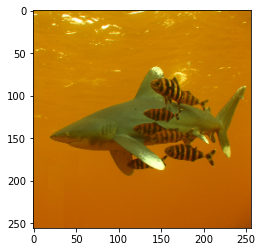

In [65]:
#visualize training data
print(train_labels[10])
plt.imshow(train_images[10])

This is good! This is an image of a whitetip shark and it's labeled correctly with one-hot encoding.

[0 0 0 0 0 0 0 0 0 0 1 0 0 0]


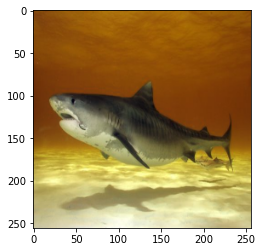

In [66]:
#another check
print(train_labels[500])
plt.imshow(train_images[500])

A tiger shark, also labeled correctly.

tiger


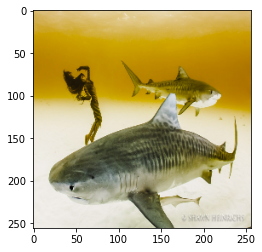

In [67]:
#check testing data in similar way - labels have not been one-hot encoded but they are appended to a list
print(test_labels[50])
plt.imshow(test_images[50])

This tiger shark is labeled correctly in the testing set.

basking


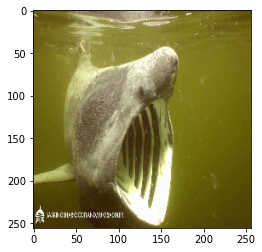

In [68]:
#one more testing set check
print(test_labels[100])
plt.imshow(test_images[100])

A very recognizable basking shark.

In [96]:
#checking split of train/test data to see that they are roughly proportional
df_ytrain = pd.DataFrame(y_train)
print(round(100*(df_ytrain.sum()/df_ytrain.count()),2))

df_yval = pd.DataFrame(y_val)
print(round(100*(df_yval.sum()/df_yval.count()),2))

0     5.51
1     7.19
2     7.07
3     7.43
4     8.62
5     7.19
6     5.15
7     5.03
8     6.59
9     7.78
10    6.35
11    8.62
12    9.58
13    7.90
dtype: float64
0      5.02
1      8.60
2      5.02
3      5.73
4      8.96
5     10.04
6      9.32
7      3.23
8      5.73
9      6.81
10     5.38
11     9.68
12     6.81
13     9.68
dtype: float64


This output compares the percentage makeup of each shark species of the training and validation datasets. Most sharks are beteen 5-10 percent of both the training and validation sets, with only one real outlier - shark species with the label 7 (Nurse shark) in the validation set.

# Modeling

In [107]:
#initiate and build a sequential neural network model with convolutional layers, pooling layers, and dense layers
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3,))) 
model.add(Dropout(0.3))
#model.add(Conv2D(filters=30, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30, kernel_size=(3,3), activation='tanh'))
#model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30, kernel_size=(3,3), activation='tanh'))
#model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30, kernel_size=(3,3), activation='tanh'))
model.add(Flatten())

#model.add(Dense(20, activation='relu'))
#model.add(Dense(15, activation='relu'))
model.add(Dense(14, activation = 'softmax'))

#add dropout layers (after every conv layer), change activation to relu, use different optimizer (sgd, rmsprop)
#start simple (conv, pool, flatten) see if overfitting and if so, check split of training/val sets for balance
#google collab to run/host model
#https://www.tensorflow.org/guide/keras/sequential_model

In [108]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [109]:
#output model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 dropout_17 (Dropout)        (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 dropout_18 (Dropout)        (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                

In [110]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10
27/27 [==============================] - 11s 396ms/step - loss: 373.6576 - acc: 0.1066 - val_loss: 2.6674 - val_acc: 0.0753
Epoch 2/10
27/27 [==============================] - 11s 400ms/step - loss: 2.2963 - acc: 0.2922 - val_loss: 2.7337 - val_acc: 0.1075
Epoch 3/10
27/27 [==============================] - 11s 397ms/step - loss: 1.7117 - acc: 0.4814 - val_loss: 3.0263 - val_acc: 0.0932
Epoch 4/10
27/27 [==============================] - 11s 394ms/step - loss: 0.9287 - acc: 0.7281 - val_loss: 3.9593 - val_acc: 0.1290
Epoch 5/10
27/27 [==============================] - 11s 394ms/step - loss: 0.4726 - acc: 0.8814 - val_loss: 5.0351 - val_acc: 0.1326
Epoch 6/10
27/27 [==============================] - 11s 395ms/step - loss: 0.2217 - acc: 0.9437 - val_loss: 6.6182 - val_acc: 0.1362
Epoch 7/10
27/27 [==============================] - 11s 395ms/step - loss: 0.1151 - acc: 0.9737 - val_loss: 7.1449 - val_acc: 0.1577
Epoch 8/10
27/27 [==============================] - 11s 401ms/step 